# Factors Affecting Freedom and Democracy of Countries by EDA LLC.


Our project is inspired by the Freedom of the World 2022 report by the Freedom House organization, which conducts research and advocacy on democracy, political freedom, and human rights and highlights the ongoing deterioration of democratic institutions around the world.
The goal of our project is to analyze the decline of countries considered 'Free' and democratic. In addition, based on different social and political factors, we want to propose a classification model to determine how democratic a government is and which direction it is likely to follow.

### Datasets
Three of the datsets we used are from the Freedom of the World report https://freedomhouse.org/report/freedom-world. These include:
 - Aggregate scores for different measures like Civil Liberties, Political Rights and freedom status from 2016 - 2022 [Aggregate_Category_and_Subcategory_Scores_FIW_2003-2022.xlsx]
 - Election Vulnerability Data 2020-2022 based on most recent election [Election_Vulnerability_Index_downloadable_data 1.28.22.xlsx]
 - Freedom status of countries/territories from 2013-2021  [All_data_FIW_2013-2022.xlsx]
 
In addition, we incorporated data about countries' poverty index and literacy rates:
 - Adult Literacy and Development Rate of Countries 2018 - 2021 [Literacy-rate_2021-1.xlsx] (https://data.unicef.org/topic/education/overview/)
 - Global Multidimensional Poverty Index Data 2007- 2018 [Multidimensional Poverty Index__.xls]

### Data Cleaning
The listed datatsets were almost close to perfect and required very little cleaning, however the protocol we have followed in order to provide any analysis or classification is:

1. Drop the columns filled with NA's
2. Drop unnamed columns which don't have any data
3. Rename useful column names which are unnamed to that present in the dataset
4. Drop the first row as it has column names for calculations
5. Reset the index of the dataframe for readability
6. Clean missing values
7. Extracted needed features to perform Machine Learning

### Visualizations

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import alldataAndAggregate as v
import educationFactorEDA as ed
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")

#### [V1] Freedom status of countries from 2013 to 2022
Each year Freedom House assign a freedom status to each country based on the combination of overall scores for political
rights and for civil liberties.
Though the number of Free countries is greater than Not Free and Partly Free, it is on the decline since 2013.
While the number of countries categorized as Not Free has been increasing steadily from 2017 to 2020 and significantly jumped from 2020 to the present.
It worth noting the relationship between the number of Not Free and Partly Free countries that seem to go opposite of each other. This can suggest that the number of Not Free countries is mostly dependent on Partly Free countries and how well they are able to solidify their democratic institutions
This brings the question, which factors help solidify or undermine a democracy?

In [2]:
# Read records for countries' status for each year and group by year and status to show the counts for each group
status_by_year = v.readFreedomStatuses()
status_by_year.head(4)  # This is just an example of the first rows of resulting dataframe

,year,status,count
0,2013,F,92
1,2013,NF,54
2,2013,PF,63
3,2014,F,90


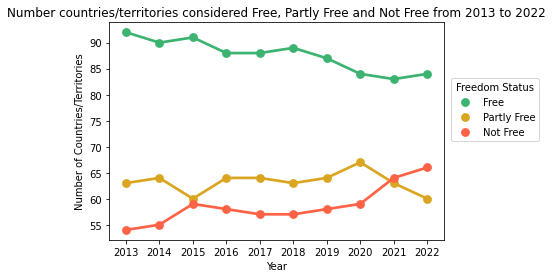

In [3]:
v.alldataVis() # Resulting Visualization, conclusions detailed above

#### [V2] Average Total Aggregate Score by Region

The total aggregation score contains different individual scores such as electoral and political processes, and freedom of expression and belief of that country or territory. As well as rule of law, personal autonomy, and individuals rights. As you can see on the graph, the countries that are in Eurasia and Middle East have the lowest average total aggregate scores which means that they lack in all these individual scores making it more authoritarian or having less freedom.

In [4]:
table = v.readAggregateVis()
table

,Total
Region,
Africa,43.727466
Americas,75.097360
Asia,57.623803
Eurasia,29.388112
Europe,87.770604
Middle East,28.345098


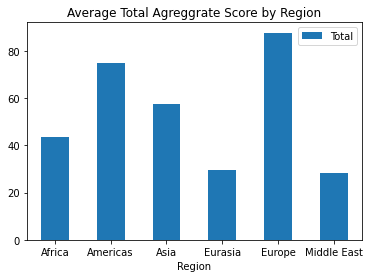

In [5]:
v.aggregateVis()

#### [V3] Literacy Rate Factor

Finding the type of relationship literacy rate has with the development rate and status of the country. After exploaring the datasets, it seemed to be plausible to make the inference that the factor literacy rate has direct relationship with both of them. As lower the literacy rate, higher the number of Less Developed Countries as well as higher number of Not Free/Partially Free countries.
This led to find out the relation of the development rate and status of the regions for the year 2018. Looking at the barchart, it can be seen that there are higher numbers of Not Free and Partially Free countries in Less/Least Developed Regions than in More Developed Regions.

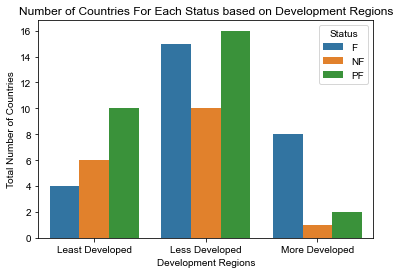

In [9]:
ed.regionPlot()

### Machine Learning Model

In [6]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#### [M1] Predicting whether a country is an electoral democracy or not based on factor such as Political Rights, Civil Liberties, Freedom of Expression.
Data is from a list of countries and a binary feature 'yes' or 'not' representing whether a countries election was considered democratic in 2022

In [7]:
dem = v.readListDem() # Dataset contains 195 countries and their electoral democracy designation in 2022
dem.head(3)

,country,dem_elec
0,Afghanistan,No
1,Albania,Yes
2,Algeria,No


In [8]:
# This dataset contains scores for different political and civil liberties factor for countries from 2013 to 2022
df = pd.read_excel('All_data_FIW_2013-2022.xlsx', sheet_name = 1, header=1)

countries_22 = df[df['Edition'] == 2022]  # Extract data for 2022 only since the
del countries_22['C/T']                   # electoral democracies data is only for 2022
del countries_22['Region']
del countries_22['Edition']
del countries_22['Total']
del countries_22['Add Q']
del countries_22['Add A']
countries_22.rename(columns = {'Country/Territory':'country'}, inplace = True)

# Merge scores for political and civil liberties factors to the approppriate country and electoral democracy designation for 2022
c_22 = countries_22.merge(dem[['country', 'dem_elec']], on = 'country', how = 'inner')
c_22.head(5)

,country,Status,PR rating,CL rating,A1,A2,A3,A,B1,B2,...,F3,F4,F,G1,G2,G3,G4,G,CL,dem_elec
0,Afghanistan,NF,7,6,0,0,0,0,0,0,...,0,0,0,0,1,0,1,2,9,No
1,Albania,PF,3,3,3,3,3,9,3,3,...,2,3,9,3,2,2,2,9,39,Yes
2,Algeria,NF,6,5,1,1,1,3,1,1,...,2,2,6,2,2,2,1,7,22,No
3,Andorra,F,1,1,4,4,4,12,4,4,...,4,3,15,4,4,3,4,15,55,Yes
4,Angola,NF,6,5,0,2,1,3,1,1,...,1,2,5,1,1,1,0,3,20,No


In [9]:
# The data above will divided into training and testing set and an SVM will run to create a model that can predict 
# the dem_elec features which is the electoral democracy designation.
X = c_22.iloc[:, 2:-1] # X festures are all except country, Status and dem_elec-what we are trying to predict
y = c_22.iloc[:, -1]   # y dem_elec-what we are trying to predict

X_train, X_test, y_train, y_test = train_test_split(X,y,  random_state = 1)
X_train = pd.DataFrame(X_train)
X_train = X_train.astype(float)

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9591836734693877


### [M2] Predicting the freeness state of a country based on factors such as Political Rights, Civil Liberties, Freedom of Expression.

In [11]:
import machineLearning as ml
# ml.plotTraining()

ml.predict_Baseline_Dummy()

Baseline Classifier Accuracy: 0.43169398907103823


In [17]:
Image(url= "trainingplot.png")

In [14]:
X_pred, y_pred = ml.predict_SVM()
Image(url= "SVMplot.png")

SVM Accuracy: 0.9617486338797814


In [15]:
X_pred, y_pred = ml.predict_KNN()
Image(url= "KNNplot.png")

KNN Accuracy: 0.9508196721311475


### Results

The highest score is clearly Europe by a significant amount which shows that countries in Europe have more freedom than the rest of the world.